At a basic level, I think of directed graphs as where the nodes are connected with arrows indicating relationships.

In this way, it could be used to represent a social network where not everyone follows everyone else, or a few users are followed by everyone.



In [1]:
import networkx as nx
import logging
import pandas as pd

In [2]:
#create log file
logging.basicConfig(filename="directed-graphs.log",level=20)

The relationships I'd like to model are between the scientific classification of the phylum Chordata (chordates).  I am no biologist, so I have used [Wikipedia](https://en.wikipedia.org/wiki/Chordate) for this information.

Currently, apart from grouping organisms into the traditional hierarchy of Domain-Kingdom-Phylum-Class-Order-Family-Genus-Species, clades are an alternate way to group, so the information in the graph will be the following:

In [6]:
taxonomy = [["domain","Eukaryota",1],["kingdom","Animalia",2],["subkingdom","Eumetazoa",3],
            ["clade","ParaHoxozoa",4],["clade","Bilateria",4],["clade","Nephrozoa",4],["superphylum","Deuterostomia",5],
            ["phylum","Chordata",6],["subphylum","Cephalochordata",7],["clade","Olfactores",8],
            ["subphylum","Vertebrata",7],["subphylum","Tunicata",7]]
groupdf = pd.DataFrame(data=taxonomy, columns=["Rank","Name","RankNum"])
groupdf

,Rank,Name,RankNum
0,domain,Eukaryota,1
1,kingdom,Animalia,2
2,subkingdom,Eumetazoa,3
3,clade,ParaHoxozoa,4
4,clade,Bilateria,4
5,clade,Nephrozoa,4
6,superphylum,Deuterostomia,5
7,phylum,Chordata,6
8,subphylum,Cephalochordata,7
9,clade,Olfactores,8


I will put these into a graph where arrows are mutual for the same rank, but go one way between ranks.

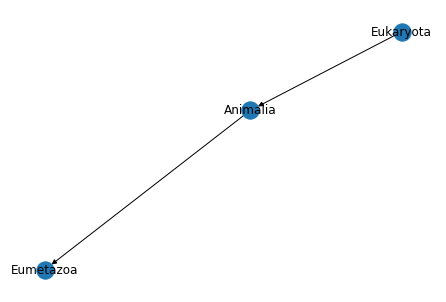

In [7]:
#create graph
dirG = nx.DiGraph()

#add nodes and edges for first three ranks
dirG.add_edges_from([(groupdf.iloc[0,1],groupdf.iloc[1,1]),(groupdf.iloc[1,1],groupdf.iloc[2,1])])
nx.draw(dirG, with_labels=True)

In [70]:
#use groupby to separate out ranks
for eachgroup in groupdf.groupby("RankNum"):
    for i, eachrow in enumerate(eachgroup):
        if i!=0:
            rowlen = len(eachrow)
            if rowlen>1:
                comborange = range(rowlen-1)
                pairs = [[rowlen-1,0]]
                for j in comborange:
                    pairs.append([j,j+1])
                print(pairs)
                for pair in pairs: #loop through those of the same RankNum
                    #add an edge for each pairs
                    dirG.add_edge(eachrow.iloc[pair[0],1], eachrow.iloc[pair[1],1])#,eachrow.iloc[j,2])

[[2, 0], [0, 1], [1, 2]]
[[2, 0], [0, 1], [1, 2]]


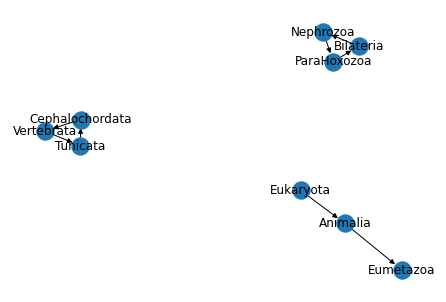

In [71]:
nx.draw(dirG, with_labels=True)